# SIR Model Simulation

In this notebook, we will simulate a simple SIR model to understand how infectious diseases spread over time in a closed population. The model divides the population into three compartments:

- **S**: The number of susceptible individuals.
- **I**: The number of infected individuals.
- **R**: The number of recovered individuals.

The equations governing the SIR model are as follows:

$$
\frac{dS}{dt} = -\beta SI
$$
$$
\frac{dI}{dt} = \beta SI - \gamma I
$$
$$
\frac{dR}{dt} = \gamma I
$$

Where:

- $\beta$ is the infection rate.
- $\gamma$ is the recovery rate.


In [ ]:
#| eval: false
#| echo: false
#| include: false
%pip install -r requirements.txt

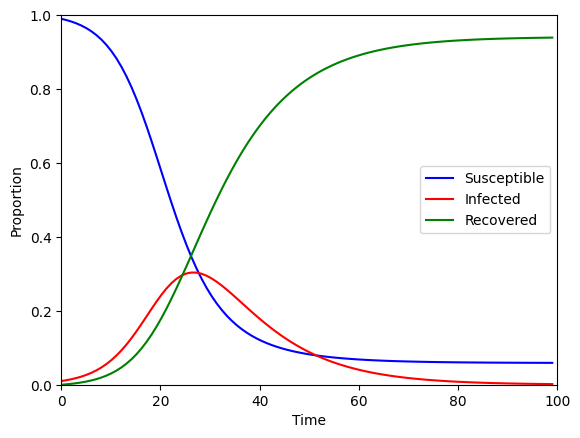

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# %matplotlib inline

# SIR model differential equations.
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions: 99% susceptible, 1% infected, 0% recovered
S0, I0, R0 = 0.99, 0.01, 0.0
y0 = [S0, I0, R0]

# Parameters
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate

# Time points
t = np.linspace(0, 100, 100)

# Integrate the SIR equations over the time grid, t.
solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

# Create a plot
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('Proportion')
line1, = ax.plot([], [], 'b-', label='Susceptible')
line2, = ax.plot([], [], 'r-', label='Infected')
line3, = ax.plot([], [], 'g-', label='Recovered')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
ax.legend()

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3

def update(frame):
    line1.set_data(t[:frame], S[:frame])
    line2.set_data(t[:frame], I[:frame])
    line3.set_data(t[:frame], R[:frame])
    return line1, line2, line3

HTML(FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True).to_html5_video())


# Explanation of the SIR Model Simulation
In this simulation, the initial conditions are set such that 99% of the population is susceptible, 1% is infected, and 0% has recovered. The infection rate $\beta$ is set to 0.3, and the recovery rate $\gamma$ is set to 0.1.

As time progresses, the number of susceptible individuals decreases, the number of infected individuals initially increases and then decreases as individuals recover, and the number of recovered individuals increases. This is a typical behavior of an infectious disease in a closed population without births or deaths.